# Simple Linear Regression Using Tensorflow v2 High Level API


## Step 1 : Tips Data

Our tips data looks like this

```
| bill | tip | 
|------|-----| 
| 50   | 12  | 
| 30   | 7   | 
| 60   | 13  | 
| 40   | 8   | 
| 65   | 15  | 
| 20   | 5   | 
| 10   | 2   | 
| 15   | 2   | 
| 25   | 3   | 
| 35   | 4   | 
```

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
## Create some tips data in pandas

tip_data = pd.DataFrame({'bill' : [50.00, 30.00, 60.00, 40.00, 65.00, 20.00, 10.00, 15.00, 25.00, 35.00],
              'tip' : [12.00, 7.00, 13.00, 8.00, 15.00, 5.00, 2.00, 2.00, 3.00, 4.00]
             })

tip_data

,bill,tip
0,50.0,12.0
1,30.0,7.0
2,60.0,13.0
3,40.0,8.0
4,65.0,15.0
5,20.0,5.0
6,10.0,2.0
7,15.0,2.0
8,25.0,3.0
9,35.0,4.0


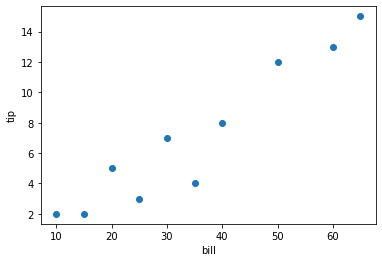

In [3]:
## Basic plot
plt.scatter(tip_data.bill, tip_data.tip)
plt.ylabel('tip')
plt.xlabel('bill')
plt.show()

### Shape Input and Output
Our tips data looks pretty linear.  
Let's extract 'input' and 'output'

In [4]:
x = tip_data['bill'].values
y = tip_data['tip'].values
print('bill = ' + str(x))
print('tip = ' + str(y))


bill = [50. 30. 60. 40. 65. 20. 10. 15. 25. 35.]
tip = [12.  7. 13.  8. 15.  5.  2.  2.  3.  4.]


## Step 2 : Define a Simple Linear Model
It only has ONE neuron with ONE input

In [5]:
import tensorflow as tf
from tensorflow import keras  # using TF.Keras !



model = tf.keras.Sequential()
model.add (keras.layers.Dense(units=1, input_shape=[1]))
# model.compile(optimizer='sgd', loss='mean_squared_error')

## TODO : try these optimizers one-by-one to get better results

# model.compile(optimizer='adam', loss='mean_squared_error')
# model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss='mean_squared_error')
# model.compile(optimizer=tf.keras.optimizers.SGD(0.01), loss='mean_squared_error')
# model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001), loss='mean_squared_error')
# model.compile(optimizer=tf.keras.optimizers.RMSprop(0.01), loss='mean_squared_error')
# model.compile(optimizer=tf.keras.optimizers.RMSprop(0.1), loss='mean_squared_error')
# model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_squared_error')
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='mean_squared_error')

# print (model.to_yaml())

## Step 3 : Train The Neural Network
This is where we supply our model 'input' data to train on.  
**Goal : We want the loss to as small as possible (if zero, it is perfect model!)**

In [6]:
%%time
## TODO : start with 100 epochs,
##         increase it (500, 1000) to see if accuracy improves

history = model.fit (x,y, epochs=100)

Train on 10 samples
Epoch 1/100
10/10 [==============================] - 0s 30ms/sample - loss: 4200.7505
Epoch 2/100
10/10 [==============================] - 0s 91us/sample - loss: 4148.9062
Epoch 3/100
10/10 [==============================] - 0s 75us/sample - loss: 4097.3936
Epoch 4/100
10/10 [==============================] - 0s 70us/sample - loss: 4046.2163
Epoch 5/100
10/10 [==============================] - 0s 91us/sample - loss: 3995.3809
Epoch 6/100
10/10 [==============================] - 0s 98us/sample - loss: 3944.8931
Epoch 7/100
10/10 [==============================] - 0s 95us/sample - loss: 3894.7571
Epoch 8/100
10/10 [==============================] - 0s 98us/sample - loss: 3844.9785
Epoch 9/100
10/10 [==============================] - 0s 98us/sample - loss: 3795.5620
Epoch 10/100
10/10 [==============================] - 0s 102us/sample - loss: 3746.5122
Epoch 11/100
10/10 [==============================] - 0s 117us/sample - loss: 3697.8335
Epoch 12/100
10/10 [==========

## Step 4 : Predict 
Now that our model is ready, lets predict tip for $100.  

**==> Q : How good is our neural network tip calculator? :-)**

In [7]:
predicted = model.predict([100.])
print ("predicted tip : ", predicted)

predicted tip :  [[-55.75874]]
